In [1]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
#import library yang akan digunakan
import numpy as np  
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
#read dataset yang akan digunakan
df_can = pd.read_excel('iot.xls',
                       sheet_name='Linear Acceleration', )
df_z_temp = df_can['Linear Acceleration z (m/s^2)']

df_can.head()


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.039189,2.484464,-0.071938,10.65811
1,0.049127,2.484464,-0.071938,10.65811
2,0.059064,2.484464,-0.071938,10.65811
3,0.069002,2.484464,-0.071938,10.65811
4,0.078939,2.484464,-0.071938,10.65811


In [4]:
#melakukan normalisasi data sumbu x
df_can['Linear Acceleration x (m/s^2)'] = df_can['Linear Acceleration x (m/s^2)']-(df_can['Linear Acceleration x (m/s^2)'].sum(axis=0)/len(df_can['Linear Acceleration x (m/s^2)']))
#melakukan normalisasi data sumbu y
df_can['Linear Acceleration y (m/s^2)'] = df_can['Linear Acceleration y (m/s^2)']-(df_can['Linear Acceleration y (m/s^2)'].sum(axis=0)/len(df_can['Linear Acceleration y (m/s^2)']))
#melakukan normalisasi data sumbu z
df_can['Linear Acceleration z (m/s^2)'] = df_can['Linear Acceleration z (m/s^2)']-(df_can['Linear Acceleration z (m/s^2)'].sum(axis=0)/len(df_can['Linear Acceleration z (m/s^2)']))

In [5]:
#inisialisasi data sumbu x
df_x = df_can[['Linear Acceleration x (m/s^2)', 'Time (s)']]
#inisialisasi data sumbu y
df_y = df_can[['Linear Acceleration y (m/s^2)', 'Time (s)']]
#inisialisasi data sumbu z
df_z = df_can[['Linear Acceleration z (m/s^2)', 'Time (s)']]

Text(0.5, 0, 'Time (s) ')

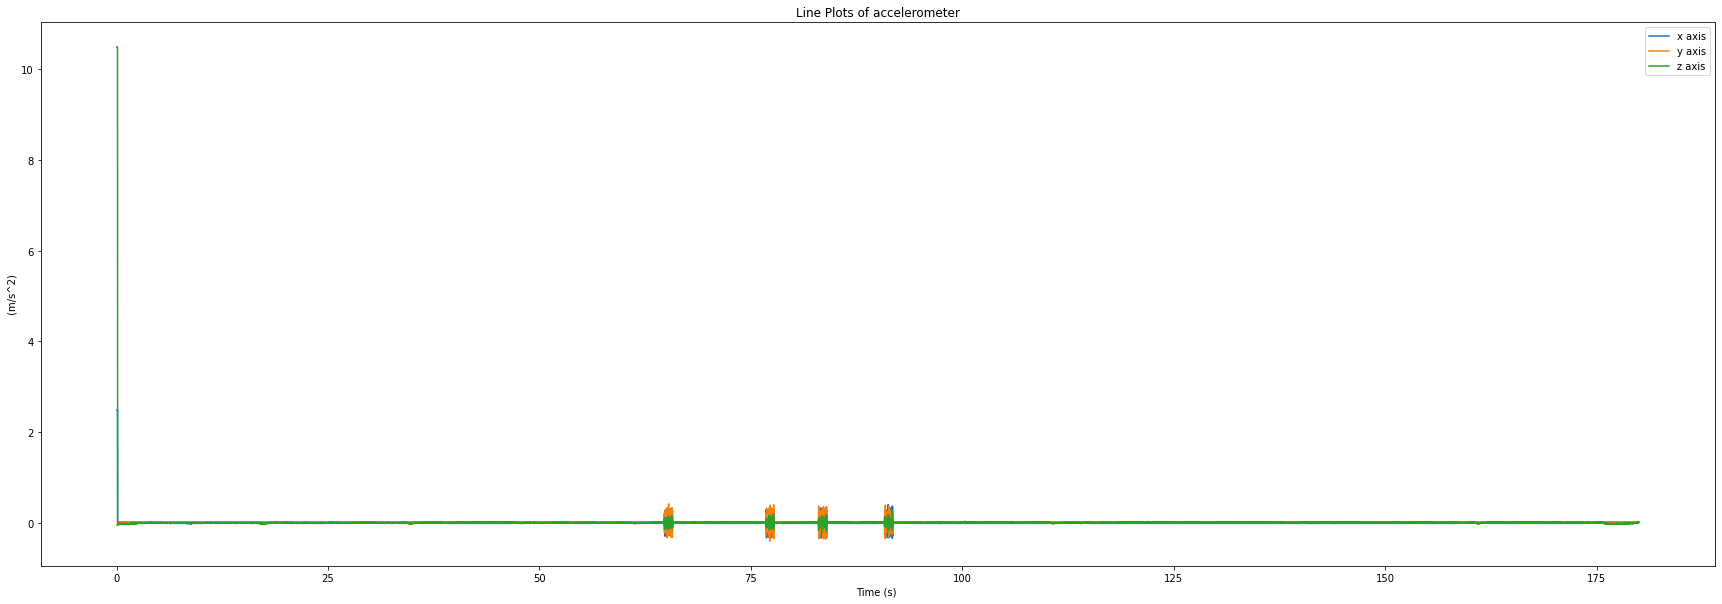

In [6]:
#melakukan plot data sumbu x y z secara bersamaan
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1) 

# plot data x y z berdasarkan time
df_x.plot(y='Linear Acceleration x (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax0, label="x axis")
df_y.plot(y='Linear Acceleration y (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax0, label="y axis")
df_z.plot(y='Linear Acceleration z (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax0, label="z axis")


ax0.set_title ('Line Plots of accelerometer')
ax0.set_ylabel(' (m/s^2) ')
ax0.set_xlabel('Time (s) ')


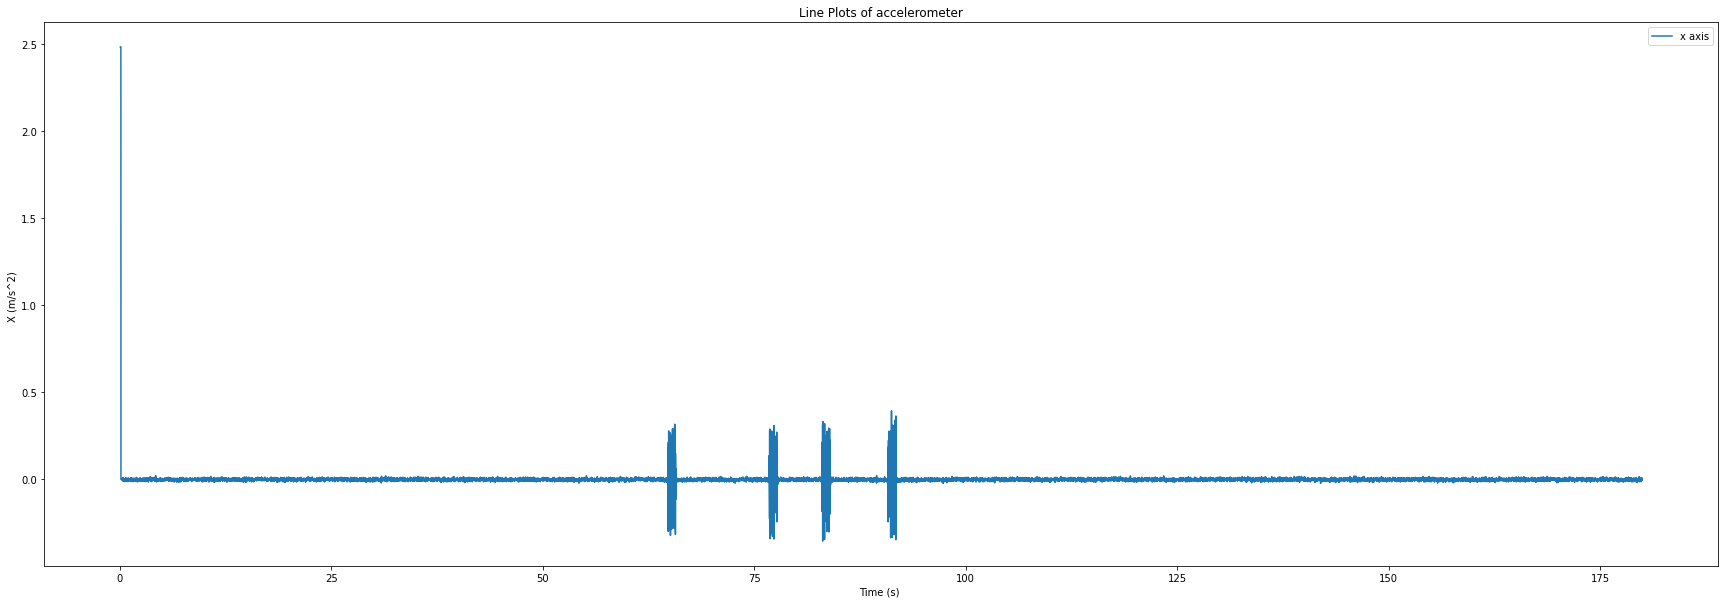

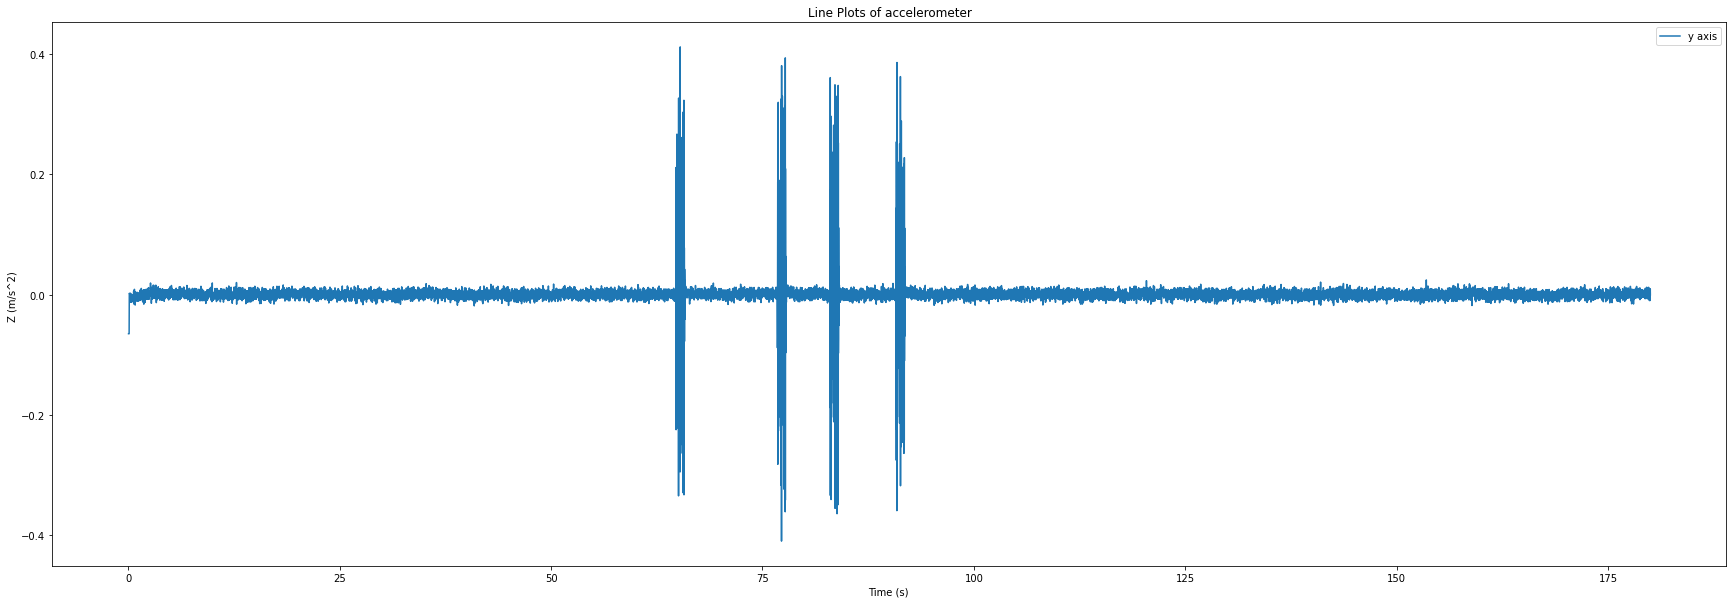

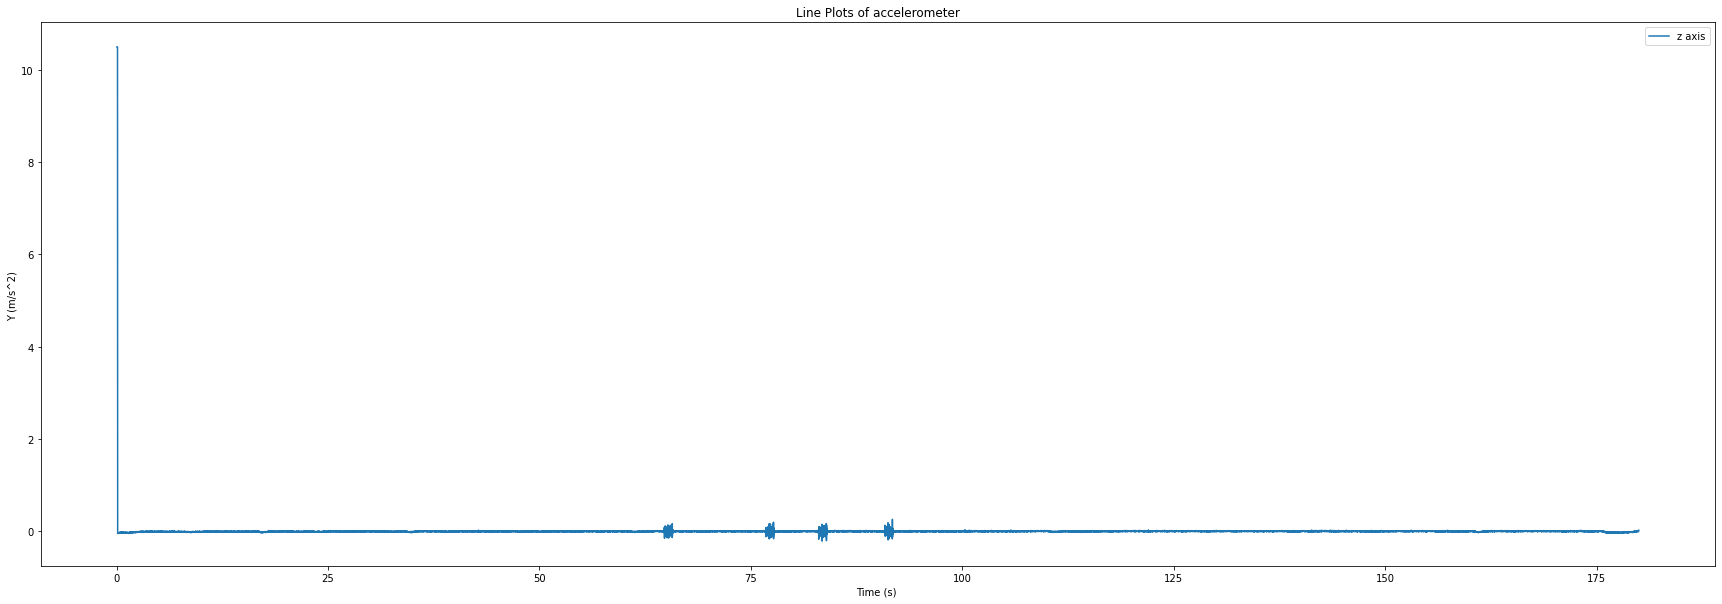

In [7]:
#membuat figure
fig0 = plt.figure() 
fig1 = plt.figure() 
fig2 = plt.figure() 

ax0 = fig0.add_subplot(1, 1, 1) 
ax1 = fig1.add_subplot(1, 1, 1)
ax2 = fig2.add_subplot(1, 1, 1)

#plot data sumbu x
df_x.plot(y='Linear Acceleration x (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax0, label="x axis")
ax0.set_title ('Line Plots of accelerometer')
ax0.set_ylabel('X (m/s^2) ')
ax0.set_xlabel('Time (s) ')

#plot data sumbu y
df_y.plot(y='Linear Acceleration y (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax1, label="y axis")
ax1.set_title ('Line Plots of accelerometer')
ax1.set_ylabel('y (m/s^2) ')
ax1.set_xlabel('Time (s) ')

#plot data sumbu z
df_z.plot(y='Linear Acceleration z (m/s^2)', x='Time (s)',kind='line', figsize=(30, 10), ax=ax2, label="z axis")
ax2.set_title ('Line Plots of accelerometer')
ax2.set_ylabel('z (m/s^2) ')
ax2.set_xlabel('Time (s) ')

plt.show()

In [8]:
# Amplitudo yang paling dominan berdasarkan plot data diatas adalah pada sumbu y dikarenakan lebih tinggi dari sumbu x dan z

18139.0


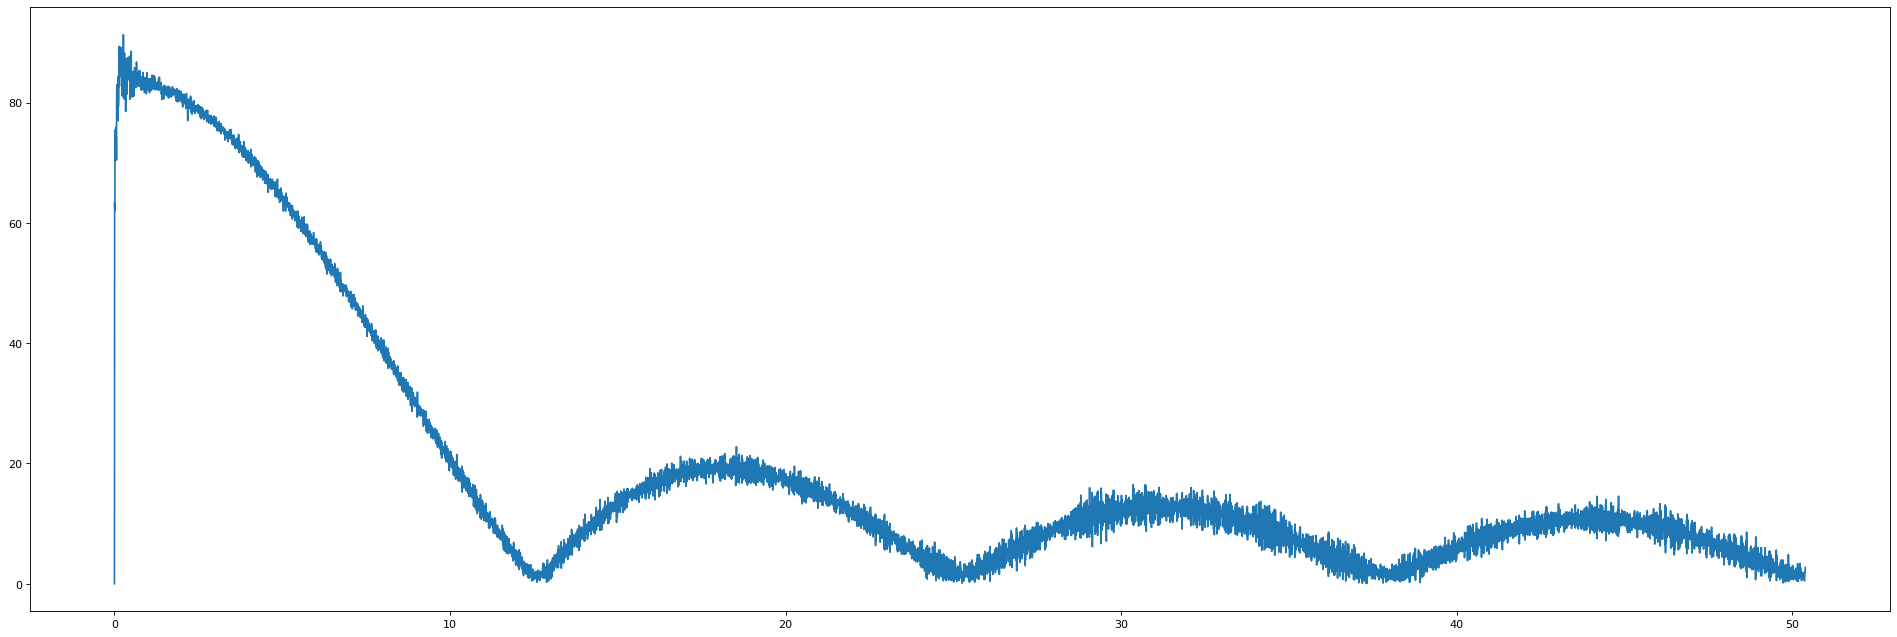

In [9]:

# FFT pada domain dominan(sumbu z)
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft 
# import modul untuk fft

DURATION = 180 #merupakan banyaknya durasi pengambilan data
SAMPLE_RATE = len(df_z['Time (s)']) / DURATION
N = SAMPLE_RATE * DURATION
print(N)

yf = rfft(df_z['Linear Acceleration z (m/s^2)'].values)
xf = rfftfreq(int(N), 1 / SAMPLE_RATE)
plt.figure(figsize=(30, 10), dpi=80)
plt.plot(xf, np.abs(yf))
plt.show()
# proses menampilkan grafik sinyal hasil fft

# penjelasan mengenai sintax dan algoritma yang dipakai
# rfft()
# adalah syntax untuk melakukan fourir transform pada python menggunakan library scipy. rfft() hanya mengembalikan nilai frekuensi yang lebih dari 0, berbeda dengan fft() yang memiliki titik tengan frekuensi pada sumbu x
# rfft() menerima sebuah parameter, yaitu data frame yang akan di ubah domainnya. terdapat tida buah parameter lainnya yaitu, jumlah titik, sumbu dan jenis normalisasi. 3 parameter ini bersifat opsional
# When the DFT is computed for purely real input, the output is Hermitian-symmetric, i.e. the negative frequency terms are just the complex conjugates of the corresponding positive-frequency terms, and the negative-frequency terms are therefore redundant. This function does not compute the negative frequency terms, and the length of the transformed axis of the output is therefore n//2 + 1.

# When A = rfft(a) and fs is the sampling frequency, A[0] contains the zero-frequency term 0*fs, which is real due to Hermitian symmetry.
# If n is even, A[-1] contains the term representing both positive and negative Nyquist frequency (+fs/2 and -fs/2), and must also be purely real. If n is odd, there is no term at fs/2; A[-1] contains the largest positive frequency (fs/2*(n-1)/n), and is complex in the general case.
# If the input a contains an imaginary part, it is silently discarded.

In [10]:
from IPython.display import Image
Image('hasil.png')

# kendaraan yang melintas pada saat pengamatan ada 3 jenis yaitu kecil, sedang dan besar. Kendaraan kecil berada pada frekuensi 13-24 Hz, Kendaraan sedang pada 26 - 36 Hz, dan kendaraan besar pada 38 - 48 Hz

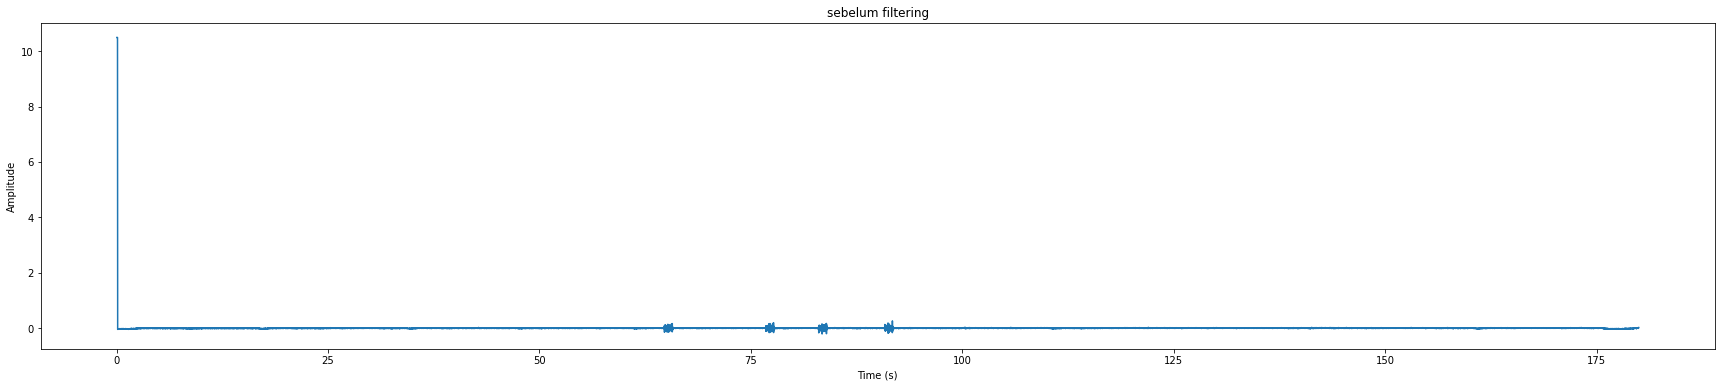

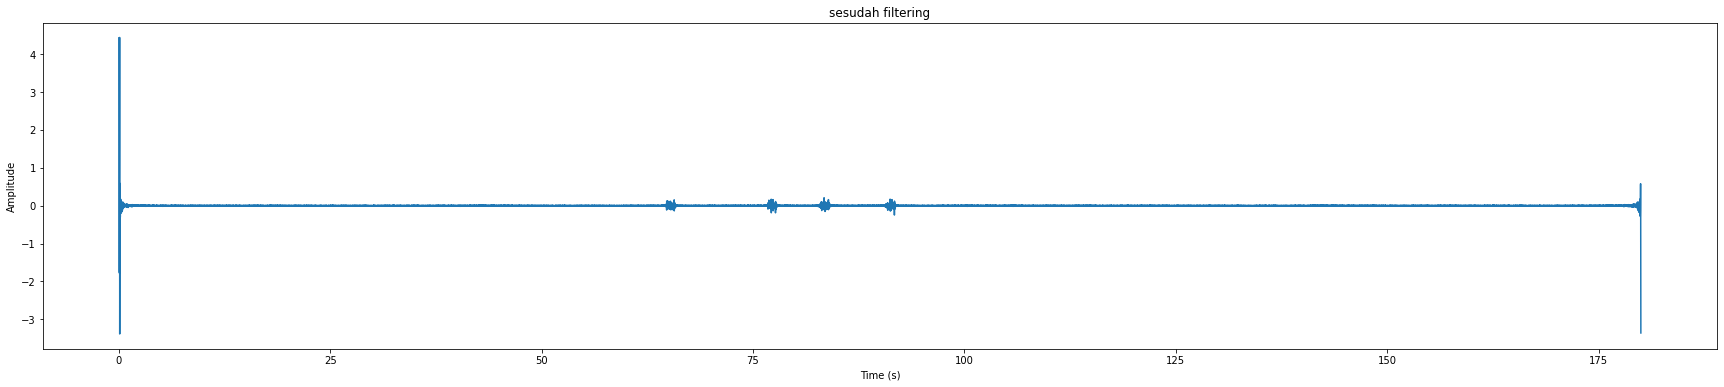

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


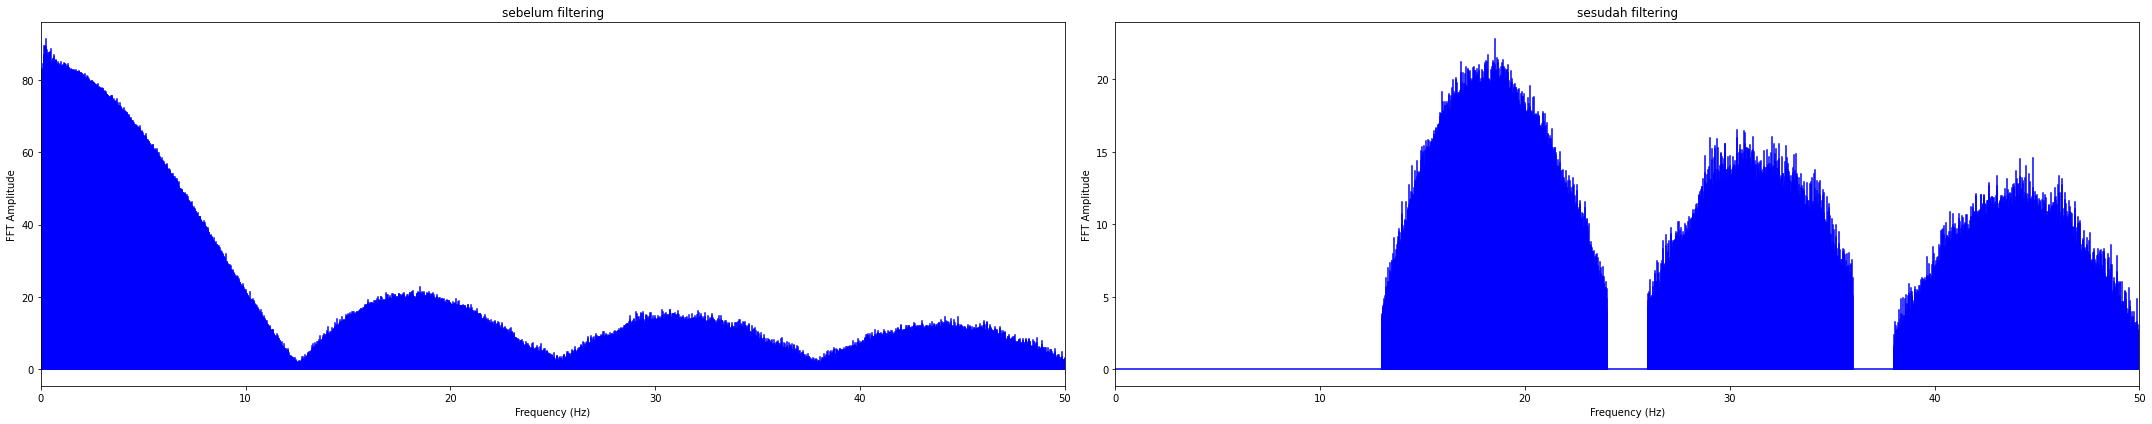

In [12]:
# notch filter
from scipy import signal
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft 

sig_fft_filtered = yf.copy()

# batas frekuensi kendaraan
cut_off_bawah = 13
cut_off_kecil_sedang_bawah = 24
cut_off_kecil_sedang_atas = 26
cut_off_sedang_besar_bawah = 36
cut_off_sedang_besar_atas = 38

# LPF
sig_fft_filtered[np.abs(xf) < cut_off_bawah] = 0.01
# notch filter
mask = ((cut_off_sedang_besar_bawah < np.abs(xf)) & (np.abs(xf) < cut_off_sedang_besar_atas))
sig_fft_filtered[mask] = 0.01
mask = ((cut_off_kecil_sedang_bawah < np.abs(xf)) & (np.abs(xf) < cut_off_kecil_sedang_atas))
sig_fft_filtered[mask] = 0.01



filtered = irfft(sig_fft_filtered)

t = df_z['Time (s)']
d = df_z['Linear Acceleration z (m/s^2)']

# plot data filtered signal
plt.figure(figsize = (30, 6))
plt.plot(t, d)
plt.title('sebelum filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize = (30, 6))
plt.plot(t[:-1], filtered)
plt.title('sesudah filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude sebelum dan sesudah
plt.figure(figsize = (30, 6))
plt.subplot(121)
plt.stem(xf, np.abs(yf), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('sebelum filtering')
plt.xlim(0, 50)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(xf, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('sesudah filtering')
plt.xlim(0, 50)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()

# notch filter dipilih karena untuk menghilangkan frekuensi yang dianggap tidak termasuk frekuensi dari motor ataupun mobil